<a href="https://colab.research.google.com/github/sovunia-hub/mathematical-modeling-of-applied-problems/blob/main/8_volterra_equation_of_the_2nd_kind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.seterr(all="ignore")

a = 0
b = 1
K = lambda x, t: np.exp(x - t)
f = lambda x: np.exp(x)
lmb = 1
u = lambda x: np.exp(2 * x)

In [ ]:
def trapeziod(n):
  h = (b - a) / n
  x = np.linspace(a, b, n)
  A = np.zeros((n, n))
  y = np.zeros(n)
  for i, xi in enumerate(x):
    for j, tj in enumerate(x):
      if j == 0 | j == n-1:
        A[i, j] = h / 2 * K(xi, tj)
      else:
        A[i, j] = h * K(xi, tj)
  y[0] = f(x[0])
  for i in range(1, n):
    s = 0
    for j in range(i):
      s += lmb * A[i, j] * y[j]
    y[i] = (f(x[i]) + s) / (1 - A[i, i])
  return x, y

In [ ]:
def simpson(n):
  h = (b - a) / n
  x = np.linspace(a, b, n)
  A = np.zeros((n, n))
  y = np.zeros(n)
  for i, xi in enumerate(x):
    for j, tj in enumerate(x):
      if j == 0 | j == n-1:
        A[i, j] = h / 3 * lmb * K(xi, tj)
      elif j % 2 == 0:
        A[i, j] = h / 3 * lmb * K(xi, tj) * 2
      else:
        A[i, j] = h / 3 * lmb * K(xi, tj) * 4
  y[0] = f(x[0])
  for i in range(1, n):
    s = 0
    for j in range(i):
      s += lmb * A[i, j] * y[j]
    y[i] = (f(x[i]) + s) / (1 - A[i, i])
  return x, y

In [ ]:
def three_eighths(n):
  h = (b - a) / n
  x = np.linspace(a, b, n)
  A = np.zeros((n, n))
  y = np.zeros(n)
  for i, xi in enumerate(x):
    for j, tj in enumerate(x):
      if j == 0 | j == n-1:
        A[i, j] = h * 3 / 8 * K(xi, tj)
      elif j % 3 == 0:
        A[i, j] = h * 3 / 8 * K(xi, tj) * 2
      else:
        A[i, j] = h * 3 / 8 * K(xi, tj) * 3
  y[0] = f(x[0])
  for i in range(1, n):
    s = 0
    for j in range(i):
      s += lmb * A[i, j] * y[j]
    y[i] = (f(x[i]) + s) / (1 - A[i, i])
  return x, y

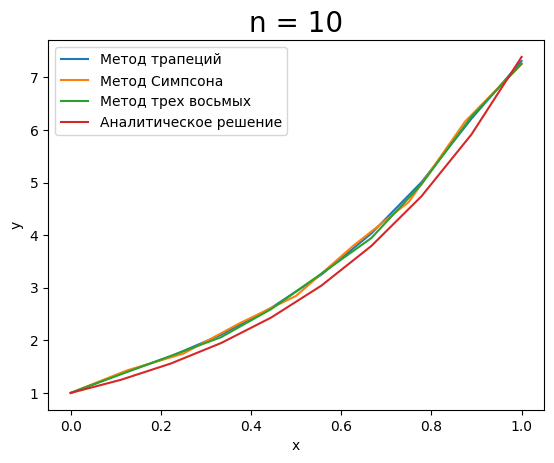

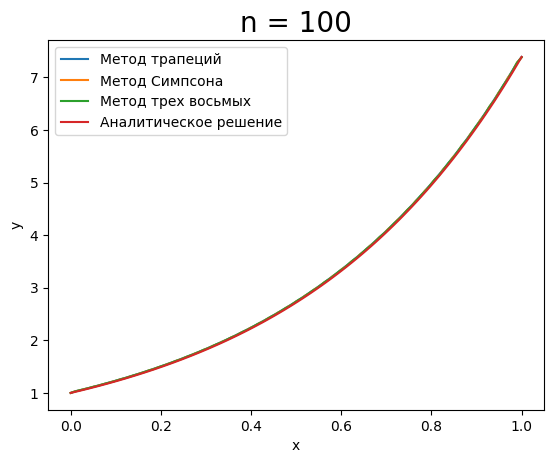

In [ ]:
N_values = [10, 100]

methods = {
    'Метод трапеций': trapeziod,
    'Метод Симпсона': simpson,
    'Метод трех восьмых': three_eighths
    }

results = pd.DataFrame(
    columns = methods.keys(),
    index = N_values
    )

for i, N in enumerate(N_values):
  for method_name, method in methods.items():
    n = N
    if method_name == 'Метод Симпсона':
      n = N - 1
    x = np.linspace(a, b, n)
    solution = u(x)
    res = method(n)
    results.loc[N, method_name] = (sum(np.abs(solution - res[1])) / sum(np.abs(solution))).round(4)
    plt.plot(*res, label=method_name)
  plt.plot(x, solution, label='Аналитическое решение')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'n = {N}', fontsize=20)
  plt.legend()
  plt.show()

In [ ]:
results

,Метод трапеций,Метод Симпсона,Метод трех восьмых
10,0.051,0.0527,0.0482
100,0.0065,0.0054,0.0055
